Solver for 4 Bar Configs!

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Inputs

lengths = {'G': 4.78, # Ground
           '1': 3, # Drive Link
           '2': 4.3, # Connector Link
           '3': 2, # Output Link
           }
angles = {'G': 180 * np.pi/180, # Required to be 180 to solve. Map if you wan other angles
          '1': 40 * np.pi/180}
omegas = {'G':0,
        '1': 1.5} # Rad/s
alphas = {'G':0,
          '1':.4} # Rad/s
config = True

vectors = {'G': 0}
vectors['G'] = len['G'] * np.exp(angles['G'] * 1j)
vectors['1'] = lengths['1'] * np.exp(angles['1'] * 1j)

In [ ]:
# Using the coordinate @ end of L1 to find the B & C Angles

C = vectors['G'] + vectors['1']

unit_i = -1 * C/ np.abs(C)
unit_j = unit_i * 1j

# Finding the unknown angles

Ax = (lengths['2']**2 + np.abs(C)**2 - lengths['3']**2) / (2 * np.abs(C))
Bx = np.abs(C) - Ax

Ay = np.sqrt(lengths['2']**2 - Ax**2)
By = np.sqrt(lengths['3']**2 - Bx**2)
if config:
    By = By * -1
else:
    Ay = Ay * -1

vectors['2'] = unit_i * Ax + unit_j * Ay
vectors['3'] = unit_i * Bx + unit_j * By

angles['2'] = np.angle(vectors['2'])
angles['3'] = np.angle(vectors['3'])


In [5]:
angles['2']

np.float64(-0.21306992691746537)

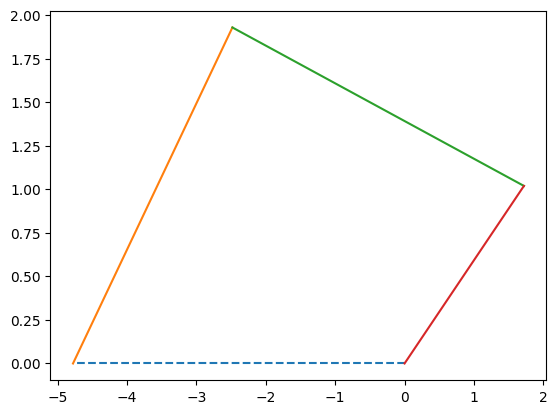

In [6]:
# Plotting
curr = complex(0,0)
for l in vectors.keys():
    prev = complex(curr)
    curr = curr + vectors[l]
    if l == "G":
        linestyle = "--"
    else:
        linestyle = ""

    plt.plot([np.real(prev), np.real(curr)],
             [np.imag(prev), np.imag(curr)],
             linestyle)

In [7]:
staticLengths = np.array( [[np.imag(vectors['2']), np.imag(vectors['3'])],
                            [np.real(vectors['2']), np.real(vectors['3'])]])
vel = np.array([-1 * np.imag(vectors['1']), -1*np.real(vectors['1'])]) * omegas['1']

omegas['2'], omegas['3'] = np.linalg.solve(staticLengths, vel)

staticLengthsCross = np.array( 
    [[np.imag(vectors['1'] * 1j), np.imag(vectors['2']*1j), np.imag(vectors['3']*1j)],
    [np.real(vectors['1'] * 1j), np.real(vectors['2']*1j), np.real(vectors['3']*1j)]]
)
sqvel = np.array([omegas['1']**2, omegas['2']**2, omegas['3']**2])
acc = np.array([np.imag(vectors['1']), np.real(vectors['1'])]) * alphas['1']

#rhs = -1 * np.dot(staticLengthsCross,sqvel) - acc
alphas['2'], alphas['3'] = np.linalg.solve(staticLengths, 
                                           -1 * np.dot(staticLengthsCross,sqvel).reshape((2,1)) - acc)

In [8]:
omegas

{'G': 0,
 '1': 1.5,
 '2': np.float64(0.25048969421311323),
 '3': np.float64(2.6148889621392444)}

Iteration

In [13]:
def kinematics(lengths, angles, omegas, alphas, config):
        vectors = {'G': 0}
        vectors['G'] = lengths['G'] * np.exp(angles['G'] * 1j)
        vectors['1'] = lengths['1'] * np.exp(angles['1'] * 1j)
        # Using the coordinate @ end of L1 to find the B & C Angles

        C = vectors['G'] + vectors['1']

        unit_i = -1 * C/ np.abs(C)
        unit_j = unit_i * 1j

        # Finding the unknown angles

        Ax = (lengths['2']**2 + np.abs(C)**2 - lengths['3']**2) / (2 * np.abs(C))
        Bx = np.abs(C) - Ax

        Ay = np.sqrt(lengths['2']**2 - Ax**2)
        By = np.sqrt(lengths['3']**2 - Bx**2)
        if config:
                By = By * -1
        else:
                Ay = Ay * -1

        vectors['2'] = unit_i * Ax + unit_j * Ay
        vectors['3'] = unit_i * Bx + unit_j * By

        angles['2'] = np.angle(vectors['2'])
        angles['3'] = np.angle(vectors['3'])

        staticLengths = np.array( [[np.imag(vectors['2']), np.imag(vectors['3'])],
                            [np.real(vectors['2']), np.real(vectors['3'])]])
        vel = np.array([-1 * np.imag(vectors['1']), -1*np.real(vectors['1'])]) * omegas['1']

        omegas['2'], omegas['3'] = np.linalg.solve(staticLengths, vel)

        staticLengthsCross = np.array( 
        [[np.imag(vectors['1'] * 1j), np.imag(vectors['2']*1j), np.imag(vectors['3']*1j)],
        [np.real(vectors['1'] * 1j), np.real(vectors['2']*1j), np.real(vectors['3']*1j)]]
        )
        sqvel = np.array([omegas['1']**2, omegas['2']**2, omegas['3']**2])
        acc = np.array([np.imag(vectors['1']), np.real(vectors['1'])]) * alphas['1']

        #rhs = -1 * np.dot(staticLengthsCross,sqvel) - acc
        alphas['2'], alphas['3'] = np.linalg.solve(staticLengths, 
                                                -1 * np.dot(staticLengthsCross,sqvel).reshape((2,1)) - acc)
        
        return(vectors, omegas, alphas)

[-10, 10, -10, 10, -10, 10, -10, 10]

In [ ]:
pitch_lim = [ (i + 90) * np.pi/180 for i in [-50, +30]]
roll_lim = [ (i + 90) * np.pi/180 for i in [-30, +30]]

lengths_pitch = {'G': 4.78, # Ground
           '1': 3, # Drive Link
           '2': 4, # Connector Link
           '3': 3.1, # Output Link
           }
angles_pitch = {'G': 180 * np.pi/180, # Required to be 180 to solve. Map if you want other angles
          '1': 40 * np.pi/180}
omegas_pitch = {'G':0,
        '1': 2} # Rad/s
alphas_pitch = {'G':0,
          '1':0} # Rad/s
config_pitch = True

resolution = 360

kin_pitch = {
    'link1': np.zeros(resolution,dtype=complex),
    'omega1': np.zeros(resolution, dtype=float),
    'alpha1': np.zeros(resolution, dtype=float),
    'link3': np.zeros(resolution,dtype=complex),
    'omega3': np.zeros(resolution, dtype=float),
    'alpha3': np.zeros(resolution, dtype=float)
}
pitch_angs = np.linspace(pitch_lim[0], pitch_lim[1], resolution)
for i in range(1,len(pitch_angs)):
    angles_pitch['1'] = pitch_angs[i]
    kin = kinematics(lengths_pitch, angles_pitch, omegas_pitch, alphas_pitch, config_pitch)    
    
    #print(kin[2]['3'])
    kin_pitch['link1'][i] = kin[0]['1']
    kin_pitch['omega1'][i] = kin[1]['1']
    kin_pitch['alpha1'][i] = kin[2]['1']
    kin_pitch['link3'][i] = kin[0]['3']
    kin_pitch['omega3'][i] = kin[1]['3']
    kin_pitch['alpha3'][i] = kin[2]['3'][0]

C:\Users\idyke\AppData\Local\Temp\ipykernel_24360\551491508.py:17: RuntimeWarning: invalid value encountered in sqrt
  Ay = np.sqrt(lengths['2']**2 - Ax**2)
C:\Users\idyke\AppData\Local\Temp\ipykernel_24360\551491508.py:18: RuntimeWarning: invalid value encountered in sqrt
  By = np.sqrt(lengths['3']**2 - Bx**2)


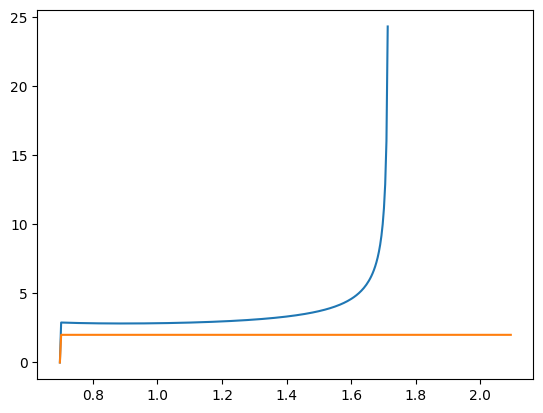

In [55]:
plt.plot(pitch_angs, kin_pitch['omega3'])
plt.plot(pitch_angs,kin_pitch['omega1'])


In [ ]:
kin_pitch['alpha3'][i] = 

np.float64(0.0)